# Determine delta activity scores of cis and trans effects

## Add section to ini

In [1]:
#function
append_section_to_ini <- function(ini_file, new_section) {
    if (is.list(new_section)) {
        ini <- ini::read.ini(ini_file)
        ini <- c(ini,new_section)
        ini::write.ini(x=ini, filepath=ini_file)
    } else {
        print('new_section is not a list')
    }
}

#list of key-value pairs
DELTA_ACTIVITY <- list(dir='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/cis+trans_effect-size', 
                plots='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/cis+trans_effect-size/plots',
                bin='/data/hodges_lab/ATAC-STARR_B-cells/bin_human-evolution/cis+trans_region-characterization/effect_size.ipynb')

#list of section, resulting in list of list.
new_section <- list(DELTA_ACTIVITY=DELTA_ACTIVITY)

#write ini
append_section_to_ini("../config.ini", new_section)

## use deeptools to map activity signal to the region sets

In [1]:
# input
#signal
HH_BW=$(read-ini ../config.ini ACTIVITY_BW hh_merged)
MM_BW=$(read-ini ../config.ini ACTIVITY_BW mm_merged)

#bed
HH_cis=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_cis-only)
HH_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_trans-only)
HH_ct=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_cis+trans)
MM_cis=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_cis-only)
MM_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_trans-only)
MM_ct=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_cis+trans)

# Output
OUT_DIR=$(read-ini ../config.ini DELTA_ACTIVITY dir)

In [2]:
# Cis
multiBigwigSummary BED-file -b $HH_BW $MM_BW -l "HH" "MM" -p 4 \
    --BED $HH_cis --outRawCounts ${OUT_DIR}/hh_cis_counts.tsv -o ${OUT_DIR}/hh_cis_counts.npz
    
multiBigwigSummary BED-file -b $HH_BW $MM_BW -l "HH" "MM" -p 4 \
    --BED $MM_cis --outRawCounts ${OUT_DIR}/mm_cis_counts.tsv -o ${OUT_DIR}/mm_cis_counts.npz


The following chromosome names did not match between the bigwig files
chromosome	length
chr18_GL383572v1_alt	    159547
chrUn_KI270587v1	      2969
chr8_KI270819v1_alt	    133535
chrUn_KI270329v1	      1040
chrUn_KI270372v1	      1650
chr8_KI270813v1_alt	    300230
chrUn_KI270580v1	      1553
chr7_KI270805v1_alt	    209988
chr13_KI270842v1_alt	     37287
chrUn_KI270448v1	      7992
chr11_KI270902v1_alt	    106711
chr9_GL383540v1_alt	     71551
chr11_KI270830v1_alt	    177092
chr11_KI270827v1_alt	     67707
chr19_KI270930v1_alt	    200773
chrUn_KI270396v1	      1880
chr1_KI270763v1_alt	    911658
chr19_GL949747v2_alt	    729520
chr22_KI270739v1_random	     73985
chr3_GL383526v1_alt	    180671
chrUn_KI270336v1	      1026
chr12_GL383549v1_alt	    120804
chrUn_KI270465v1	      1774
chr5_GL949742v1_alt	    226852
chr3_KI270781v1_alt	    113034
chr19_KI270931v1_alt	    170148
chr21_KI270873v1_alt	    143900
chr1_KI270892v1_alt	    162212
chr6_GL000252v2_alt	   4604811
chr13_KI270840v1_alt	 

chr9_KI270717v1_random	     40062
chrUn_KI270364v1	      2855
chrUn_KI270743v1	    210658
chrUn_KI270363v1	      1803
chr5_KI270792v1_alt	    179043
chr1_KI270714v1_random	     41717
chr1_KI270766v1_alt	    256271
chr22_KI270735v1_random	     42811
chr19_GL383574v1_alt	    155864
chr11_JH159136v1_alt	    200998
chr2_KI270768v1_alt	    110099
chr15_GL383555v2_alt	    388773
chr11_KI270903v1_alt	    214625
chrUn_KI270742v1	    186739
chrUn_KI270429v1	      1361
chrUn_KI270386v1	      1788
chr19_KI270884v1_alt	    157053
chrUn_KI270385v1	       990
chr3_KI270783v1_alt	    109187
chr15_KI270905v1_alt	   5161414
chr6_KI270797v1_alt	    197536
chr6_KI270798v1_alt	    271782
chr1_GL383520v2_alt	    366580
chr19_KI270929v1_alt	    186203
chrUn_KI270521v1	      7642
chr4_KI270790v1_alt	    220246
chr16_KI270855v1_alt	    232857
chr17_KI270859v1_alt	    108763
chr12_GL383553v2_alt	    152874
chr2_KI270771v1_alt	    110395
chr14_KI270847v1_alt	   1511111
chr7_KI270804v1_alt	    157952
chr4_GL3835

chrUn_KI270391v1	      1484
chr5_KI270796v1_alt	    172708
chrUn_KI270396v1	      1880
chrUn_KI270528v1	      2983
chr12_GL383553v2_alt	    152874
chr6_GL000251v2_alt	   4795265
chr7_KI270808v1_alt	    271455
chr6_KI270797v1_alt	    197536
chrUn_KI270389v1	      1298
chr22_KI270928v1_alt	    176103
chr14_KI270847v1_alt	   1511111
chr11_JH159136v1_alt	    200998
chrUn_KI270385v1	       990
chr2_GL383522v1_alt	    123821
chr7_KI270899v1_alt	    190869
chrX_KI270913v1_alt	    274009
chr8_KI270821v1_alt	    985506
chr21_GL383579v2_alt	    201197
chrUn_KI270366v1	      8320
chr11_KI270830v1_alt	    177092
chr19_KI270930v1_alt	    200773
chrUn_KI270448v1	      7992
chr2_KI270774v1_alt	    223625
chrUn_KI270522v1	      5674
chr12_KI270834v1_alt	    119498
chr19_GL383576v1_alt	    188024
chrUn_KI270412v1	      1179
chr19_KI270915v1_alt	    170665
chr1_KI270766v1_alt	    256271
chr12_GL383549v1_alt	    120804
chrUn_KI270581v1	      7046
chrUn_KI270529v1	      1899
chr17_GL383566v1_alt	     9021

Number of bins found: 1040


In [3]:
# trans
multiBigwigSummary BED-file -b $HH_BW $MM_BW -l "HH" "MM" -p 4 \
    --BED $HH_trans --outRawCounts ${OUT_DIR}/hh_trans_counts.tsv -o ${OUT_DIR}/hh_trans_counts.npz
    
multiBigwigSummary BED-file -b $HH_BW $MM_BW -l "HH" "MM" -p 4 \
    --BED $MM_trans --outRawCounts ${OUT_DIR}/mm_trans_counts.tsv -o ${OUT_DIR}/mm_trans_counts.npz


The following chromosome names did not match between the bigwig files
chromosome	length
chr15_GL383555v2_alt	    388773
chr19_GL949751v2_alt	   1002683
chrUn_KI270379v1	      1045
chr22_KI270732v1_random	     41543
chr17_KI270908v1_alt	   1423190
chr7_KI270805v1_alt	    209988
chrUn_KI270752v1	     27745
chr6_GL383533v1_alt	    124736
chr19_KI270884v1_alt	    157053
chrUn_KI270418v1	      2145
chrUn_KI270741v1	    157432
chr6_GL000251v2_alt	   4795265
chr22_KI270737v1_random	    103838
chr19_GL383575v2_alt	    170222
chr12_GL877875v1_alt	    167313
chr9_GL383539v1_alt	    162988
chr12_GL383551v1_alt	    184319
chrUn_KI270389v1	      1298
chr2_KI270715v1_random	    161471
chrUn_KI270529v1	      1899
chrUn_KI270394v1	       970
chr16_GL383556v1_alt	    192462
chr18_KI270864v1_alt	    111737
chrUn_KI270312v1	       998
chrUn_KI270516v1	      1300
chr3_KI270934v1_alt	    163458
chrX_KI270880v1_alt	    284869
chr1_KI270763v1_alt	    911658
chrUn_KI270583v1	      1400
chr17_KI270859v1_alt	 

chr3_KI270937v1_alt	    165607
chr12_GL383552v1_alt	    138655
chrUn_KI270305v1	      1472
chr17_GL383565v1_alt	    223995
chrUn_KI270303v1	      1942
chr4_KI270896v1_alt	    378547
chrUn_KI270435v1	     92983
chr1_KI270762v1_alt	    354444
chr4_KI270788v1_alt	    158965
chrUn_KI270419v1	      1029
chr3_KI270778v1_alt	    248252
chrUn_KI270391v1	      1484
chrUn_KI270587v1	      2969
chrUn_KI270317v1	     37690
chr19_KI270922v1_alt	    187935
chr21_KI270874v1_alt	    166743
chr17_KI270907v1_alt	    137721
chr13_KI270840v1_alt	    191684
chrUn_KI270395v1	      1143
chrX_KI270881v1_alt	    144206
chrUn_KI270508v1	      1951
chr19_KI270868v1_alt	     61734
chr19_KI270921v1_alt	    282224
chr19_KI270919v1_alt	    170701
chr4_GL383527v1_alt	    164536
chr18_GL383572v1_alt	    159547
chr13_KI270842v1_alt	     37287
chr10_GL383546v1_alt	    309802
chr5_KI270791v1_alt	    195710
chr11_JH159136v1_alt	    200998
chr17_KI270910v1_alt	    157099
chr19_KI270885v1_alt	    171027
chr3_KI270895v1_alt	

chrUn_KI270322v1	     21476
chrUn_KI270466v1	      1233
chrUn_KI270388v1	      1216
chr15_KI270852v1_alt	    478999
chr19_GL949752v1_alt	    987100
chrUn_KI270435v1	     92983
chr9_GL383540v1_alt	     71551
chrUn_KI270429v1	      1361
chrUn_GL000226v1	     15008
chr9_KI270718v1_random	     38054
chr12_GL383550v2_alt	    169178
chr1_KI270766v1_alt	    256271
chr17_GL383563v3_alt	    375691
chrUn_KI270329v1	      1040
chrUn_KI270338v1	      1428
chr10_KI270824v1_alt	    181496
chr11_GL383547v1_alt	    154407
chrUn_KI270438v1	    112505
chr12_KI270834v1_alt	    119498
chr8_KI270811v1_alt	    292436
chr16_GL383556v1_alt	    192462
chr8_KI270816v1_alt	    305841
chr19_KI270933v1_alt	    170537
chr17_GL383565v1_alt	    223995
chr2_GL383522v1_alt	    123821
chr18_GL383568v1_alt	    104552
chr4_KI270896v1_alt	    378547
chrUn_KI270419v1	      1029
chr1_KI270714v1_random	     41717
chr9_KI270720v1_random	     39050
chrUn_KI270384v1	      1658
chr22_KI270878v1_alt	    186262
chr19_KI270885v1_alt

In [4]:
# ct
multiBigwigSummary BED-file -b $HH_BW $MM_BW -l "HH" "MM" -p 4 \
    --BED $HH_ct --outRawCounts ${OUT_DIR}/hh_ct_counts.tsv -o ${OUT_DIR}/hh_ct_counts.npz
    
multiBigwigSummary BED-file -b $HH_BW $MM_BW -l "HH" "MM" -p 4 \
    --BED $MM_ct --outRawCounts ${OUT_DIR}/mm_ct_counts.tsv -o ${OUT_DIR}/mm_ct_counts.npz


The following chromosome names did not match between the bigwig files
chromosome	length
chrUn_KI270752v1	     27745
chr19_GL949752v1_alt	    987100
chr9_GL383539v1_alt	    162988
chr12_GL383551v1_alt	    184319
chrUn_KI270509v1	      2318
chr18_GL383570v1_alt	    164789
chr16_KI270856v1_alt	     63982
chr8_KI270810v1_alt	    374415
chr19_KI270889v1_alt	    170698
chr22_KI270737v1_random	    103838
chrUn_KI270374v1	      2656
chr2_KI270715v1_random	    161471
chr13_KI270839v1_alt	    180306
chr1_KI270707v1_random	     32032
chrUn_KI270580v1	      1553
chrUn_KI270373v1	      1451
chrUn_KI270468v1	      4055
chrUn_GL000216v2	    176608
chr9_GL383542v1_alt	     60032
chr8_KI270822v1_alt	    624492
chrUn_KI270378v1	      1048
chrUn_KI270588v1	      6158
chr19_GL383575v2_alt	    170222
chrUn_KI270414v1	      2489
chr17_KI270907v1_alt	    137721
chr21_GL383578v2_alt	     63917
chrUn_KI270539v1	       993
chr17_GL383566v1_alt	     90219
chr7_KI270809v1_alt	    209586
chr5_KI270793v1_alt	    1

chr12_GL877876v1_alt	    408271
chrUn_KI270741v1	    157432
chrUn_KI270530v1	      2168
chr4_KI270786v1_alt	    244096
chr1_KI270761v1_alt	    165834
chr19_GL949751v2_alt	   1002683
chr19_KI270888v1_alt	    155532
chr19_GL949750v2_alt	   1066390
chr19_KI270938v1_alt	   1066800
chr19_KI270866v1_alt	     43156
chrUn_KI270395v1	      1143
chrUn_KI270521v1	      7642
chr15_KI270850v1_alt	    430880
chr19_KI270933v1_alt	    170537
chr4_KI270787v1_alt	    111943
chr8_KI270926v1_alt	    229282
chr18_GL383572v1_alt	    159547
chr3_KI270778v1_alt	    248252
chr7_KI270805v1_alt	    209988
chr18_GL383567v1_alt	    289831
chr15_KI270848v1_alt	    327382
chrUn_KI270419v1	      1029
chr8_KI270812v1_alt	    282736
chr11_KI270826v1_alt	    186169
chr16_KI270855v1_alt	    232857
chr19_KI270923v1_alt	    189352
chr11_KI270831v1_alt	    296895
chr19_GL383576v1_alt	    188024
chrUn_KI270582v1	      6504
chr17_KI270857v1_alt	   2877074
chr12_KI270837v1_alt	     40090
chrUn_KI270371v1	      2805
chr19_KI270

chr1_KI270709v1_random	     66860
chrUn_KI270372v1	      1650
chrUn_GL000218v1	    161147
chr22_GL383582v2_alt	    162811
chr6_GL000252v2_alt	   4604811
chrUn_KI270435v1	     92983
chr3_KI270937v1_alt	    165607
chr11_KI270832v1_alt	    210133
chrUn_KI270373v1	      1451
chr12_GL383552v1_alt	    138655
chr12_GL383551v1_alt	    184319
chr19_KI270931v1_alt	    170148
chr22_KI270877v1_alt	    101331
chr21_GL383578v2_alt	     63917
chrUn_KI270509v1	      2318
chr17_KI270908v1_alt	   1423190
chrUn_KI270448v1	      7992
chr16_KI270856v1_alt	     63982
chr3_KI270784v1_alt	    184404
chr16_GL383556v1_alt	    192462
chr4_KI270925v1_alt	    555799
chr7_GL383534v2_alt	    119183
chrUn_KI270366v1	      8320
chr20_GL383577v2_alt	    128386
chrUn_KI270467v1	      3920
chrUn_KI270593v1	      3041
chrUn_KI270392v1	       971
chr19_KI270888v1_alt	    155532
chr1_KI270759v1_alt	    425601
chr13_KI270840v1_alt	    191684
chr11_KI270831v1_alt	    296895
chr2_KI270774v1_alt	    223625
chr1_KI270766v1_alt	 

Number of bins found: 3994


## Plot effect size differences

In [1]:
suppressPackageStartupMessages(library(tidyverse))

ini <- ini::read.ini("../config.ini")

In [2]:
#read in results: 
columns <- c("chr", "start", "end", "HH", "MM")

#cis
h_cis <- read_tsv(paste0(ini$DELTA_ACTIVITY$dir, "/hh_cis_counts.tsv"), skip = 1, col_names = columns) %>% 
    mutate(origin = "HH_active")
m_cis <- read_tsv(paste0(ini$DELTA_ACTIVITY$dir, "/mm_cis_counts.tsv"), skip = 1, col_names = columns) %>% 
    mutate(origin = "MM_active")

#trans
h_trans <- read_tsv(paste0(ini$DELTA_ACTIVITY$dir, "/hh_trans_counts.tsv"), skip = 1, col_names = columns) %>% 
    mutate(origin = "HH_active")
m_trans <- read_tsv(paste0(ini$DELTA_ACTIVITY$dir, "/mm_trans_counts.tsv"), skip = 1, col_names = columns) %>% 
    mutate(origin = "MM_active")

#cis+trans
h_ct <- read_tsv(paste0(ini$DELTA_ACTIVITY$dir, "/hh_ct_counts.tsv"), skip = 1, col_names = columns) %>% 
    mutate(origin = "HH_active")
m_ct <- read_tsv(paste0(ini$DELTA_ACTIVITY$dir, "/mm_ct_counts.tsv"), skip = 1, col_names = columns) %>% 
    mutate(origin = "MM_active")

Rows: 1114 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (4): start, end, HH, MM


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1040 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (4): start, end, HH, MM


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 812 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (4): start, end, HH, MM


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1171 Columns: 5

── Column specification 

In [3]:
#merge
cis <- bind_rows(h_cis, m_cis) %>% mutate(category = "cis only")
trans <- bind_rows(h_trans, m_trans) %>% mutate(category = "trans only")
ct <- bind_rows(h_ct, m_ct) %>% mutate(category = "cis & trans")

all <- bind_rows(cis, trans, ct)

Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 8 rows containing non-finite values (stat_ydensity).”


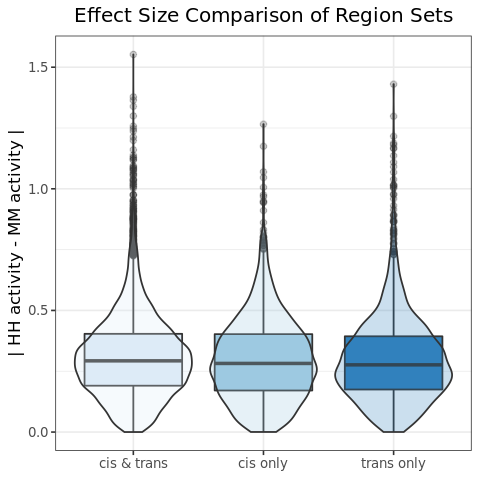

In [4]:
#plot
p <- ggplot(all, aes(x = category, y = abs(HH-MM), fill = category)) +
    geom_boxplot(outlier.alpha = 0.25) +
    geom_violin(alpha = 0.25) +
    scale_fill_brewer(palette = "Blues") +
    labs(y = "| HH activity - MM activity |", title = "Effect Size Comparison of Region Sets") +
    theme_bw(base_size = 10) +
    theme(legend.position = "none", axis.title.x = element_blank(), plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 4, repr.plot.height = 4)
p

In [5]:
ggsave(plot = p, filename = paste0(ini$DELTA_ACTIVITY$plots, "/box+violin_plot_all.pdf"), device = cairo_pdf, width = 4, height = 4)

Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 8 rows containing non-finite values (stat_ydensity).”
